**Install Necessary Libraries**

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier


**Load the Dataset**

In [4]:
# Load the dataset
file_path = "creditcard.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data Exploration**

In [5]:
# Check the shape of the dataset
print(f"Dataset Shape: {data.shape}")

# Check the data types and null values
print(data.info())

# Summary statistics of the dataset
print(data.describe())


Dataset Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n

**Visualize Class Distribution**

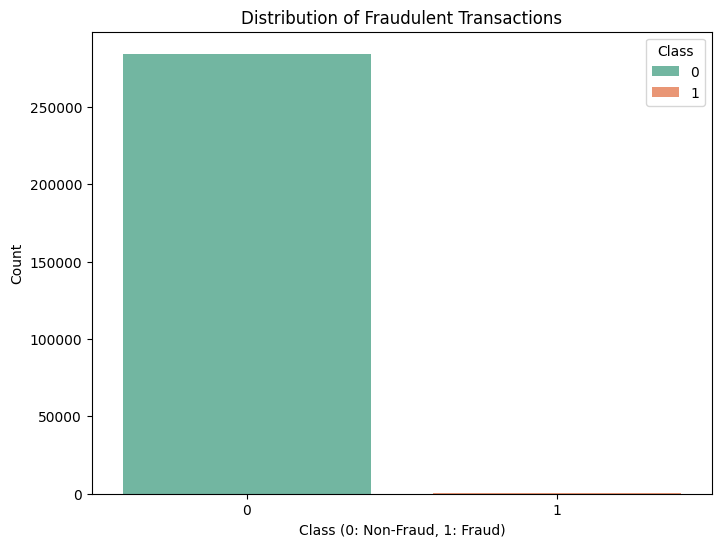

In [7]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, hue='Class', palette='Set2')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


**Feature Engineering**

In [8]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


**Train Machine Learning Models**

**Logistic Regression**

In [10]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



**Decision Tree Classifier**

In [11]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.74      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



**Random Forest Classifier**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



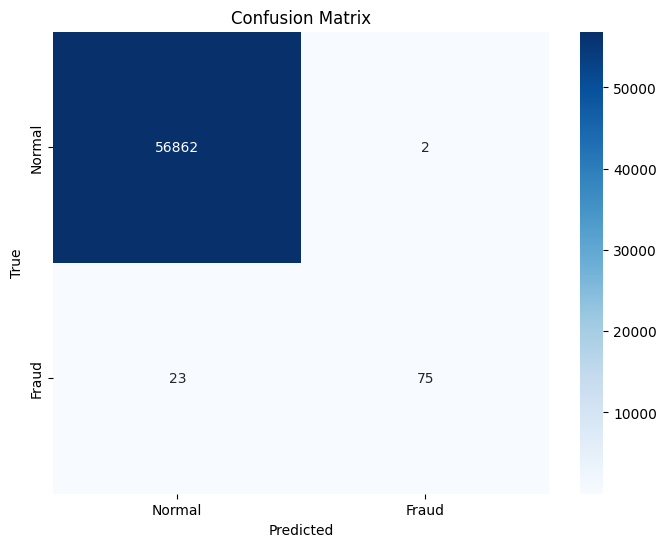

In [3]:

# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load the dataset
df = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')

# Step 3: Preprocessing (assuming 'Class' is the target variable)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_rf = rf_model.predict(X_test)

# Step 7: Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Neural Network Classifier**

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.45      0.17      0.25        98

    accuracy                           1.00     56962
   macro avg       0.72      0.59      0.62     56962
weighted avg       1.00      1.00      1.00     56962



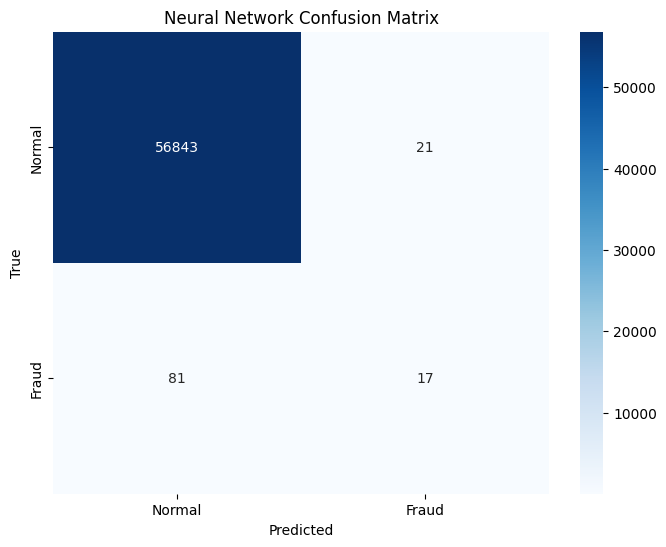

In [2]:
# Step 1: Install necessary libraries if not already installed
# !pip install pandas numpy scikit-learn seaborn matplotlib

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier  # Importing MLPClassifier

# Step 3: Load the dataset
df = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')

# Step 4: Preprocessing (assuming 'Class' is the target variable)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Neural Network model
nn_model = MLPClassifier(max_iter=300)
nn_model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred_nn = nn_model.predict(X_test)

# Step 8: Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Step 9: Optional - Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Visualize Confusion Matrices**

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')


In [5]:
# Features (X) and Target (y)
X = data.drop('Class', axis=1)  # Drop the target column from features
y = data['Class']  # The target column (fraud or not)


In [6]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 1: Load the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Step 2: Load the dataset
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')

# Step 3: Prepare features (X) and target (y)
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Target (fraud or not)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Logistic Regression
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train_scaled, y_train)

# Step 7: Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Step 8: Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Step 9: Train Neural Network
nn_model = MLPClassifier(max_iter=300)
nn_model.fit(X_train_scaled, y_train)

# Step 10: Make predictions
# Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)

# Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Random Forest
y_pred_rf = rf_model.predict(X_test)

# Neural Network
y_pred_nn = nn_model.predict(X_test_scaled)


**Feature Importance Plot (for Random Forest)**

C:\Users\MATHAN\AppData\Local\Temp\ipykernel_9996\2292823959.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


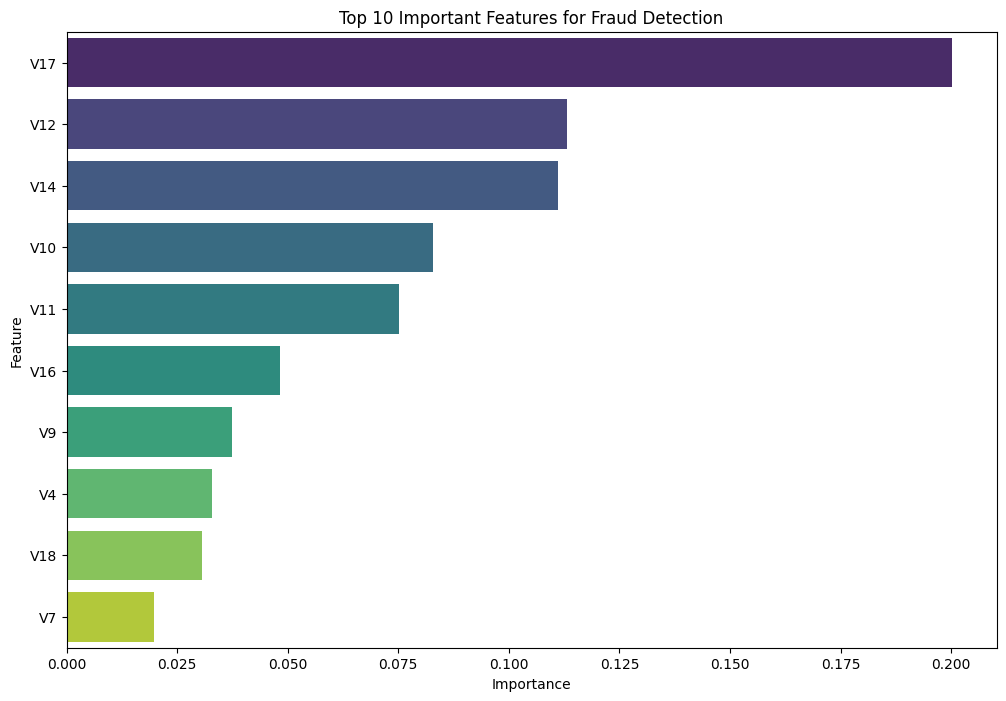

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Step 2: Load the dataset
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')

# Step 3: Prepare features (X) and target (y)
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Target (fraud or not)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Step 7: Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Step 8: Get feature importances from Random Forest model
feature_importances = rf_model.feature_importances_

# Step 9: Create a DataFrame for visualization
features = X.columns  # Use feature names from X, which excludes 'Class'
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 10: Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features for Fraud Detection')
plt.show()


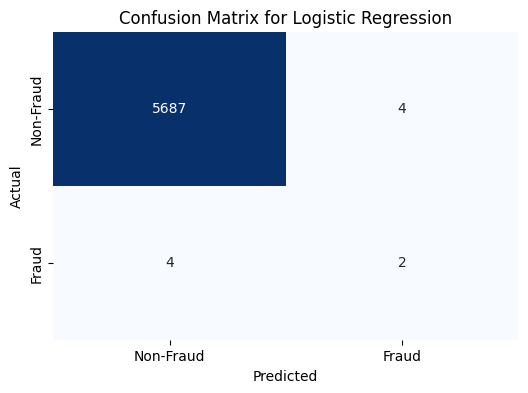

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.33      0.33      0.33         6

    accuracy                           1.00      5697
   macro avg       0.67      0.67      0.67      5697
weighted avg       1.00      1.00      1.00      5697



In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load a smaller subset of the dataset (use only 10% of the data for faster execution)
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')
data_sampled = data.sample(frac=0.1, random_state=42)  # Take 10% of the data

# Step 3: Prepare features (X) and target (y)
X = data_sampled.drop('Class', axis=1)
y = data_sampled['Class']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Logistic Regression model for fast execution
log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions with Logistic Regression
y_pred_log = log_model.predict(X_test_scaled)

# Step 8: Plot confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

# Step 9: Evaluate Logistic Regression
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


**ROC Curve**

C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


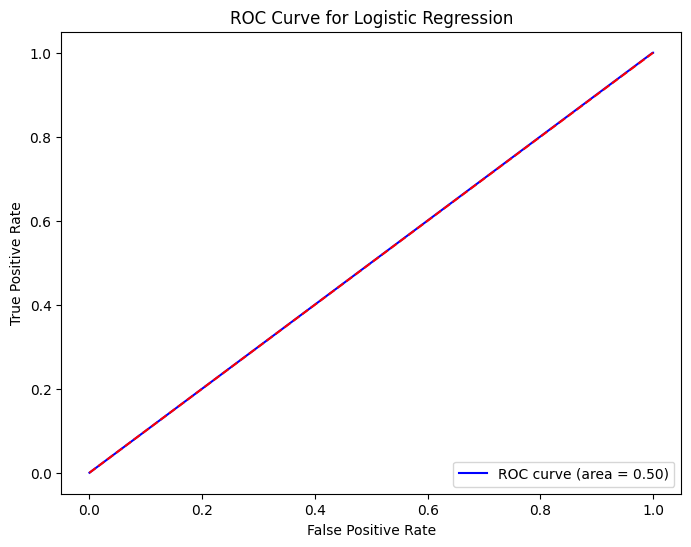

NameError: name 'dt_model' is not defined

In [5]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve for each model
plot_roc_curve(y_test, log_model.predict_proba(X_test)[:, 1], "Logistic Regression")
plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], "Decision Tree")
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], "Random Forest")
plot_roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1], "Neural Network")


**Boxplots to Identify Outliers**

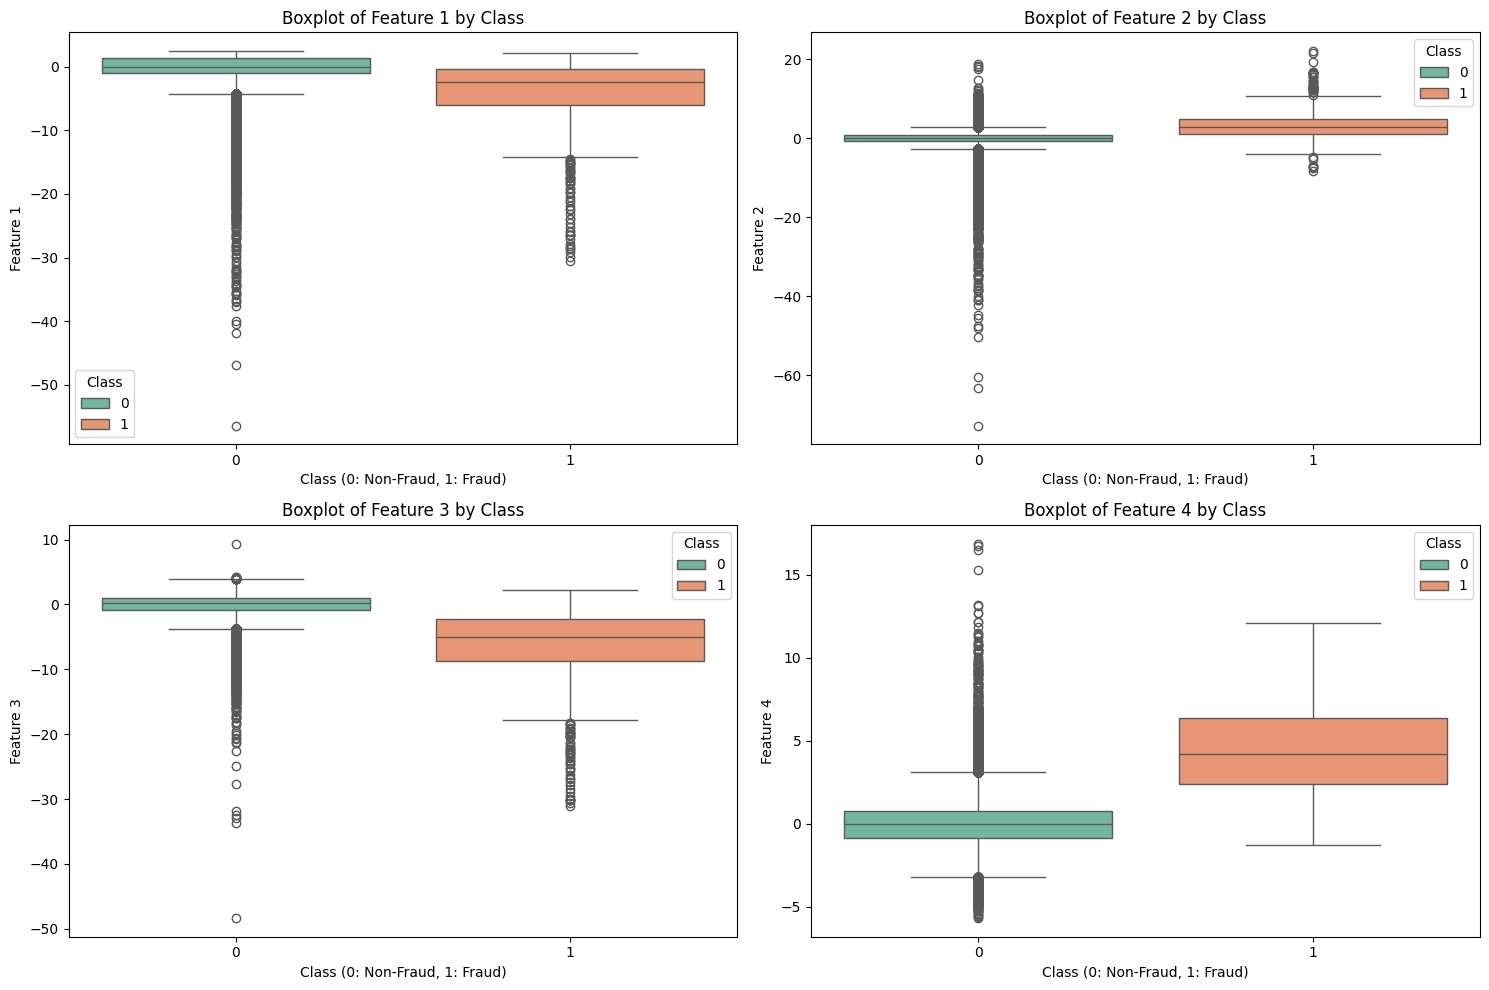

In [7]:
# Create boxplots for the first few features
plt.figure(figsize=(15, 10))
for i in range(1, 5):  # Adjust the range to visualize more features
    plt.subplot(2, 2, i)
    sns.boxplot(x='Class', y=data.columns[i], data=data,hue='Class', palette='Set2')
    plt.title(f'Boxplot of Feature {i} by Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(f'Feature {i}')

plt.tight_layout()
plt.show()


**Pair Plots to Visualize Feature Relationships**

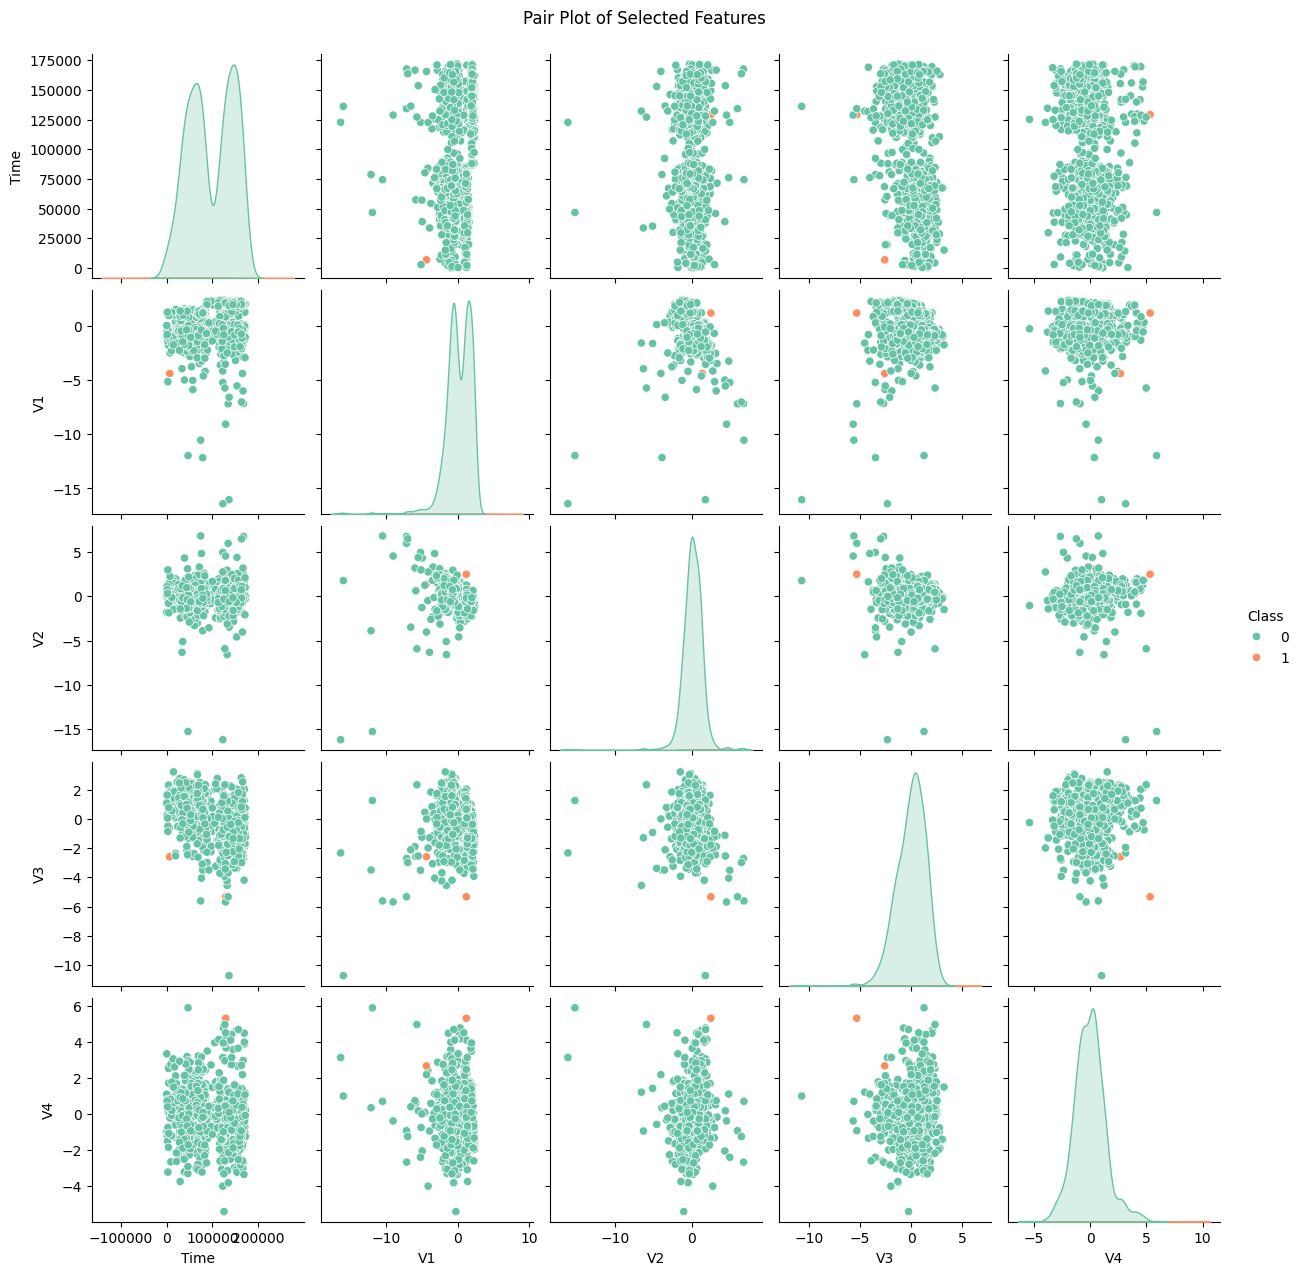

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
data = pd.read_csv('creditcard.csv')

# Sample 1000 rows from the dataset to reduce computation time
data_sampled = data.sample(1000)

# Create pair plot on the sampled data
subset_features = data.columns[:5]  # Adjust the features as needed
sns.pairplot(data_sampled[subset_features].assign(Class=data_sampled['Class']), hue='Class', palette='Set2')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Use only 3 features for faster execution
subset_features = data.columns[:3]
sns.pairplot(data[subset_features].assign(Class=data['Class']), hue='Class', palette='Set2')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


**Distribution Plots by Class**

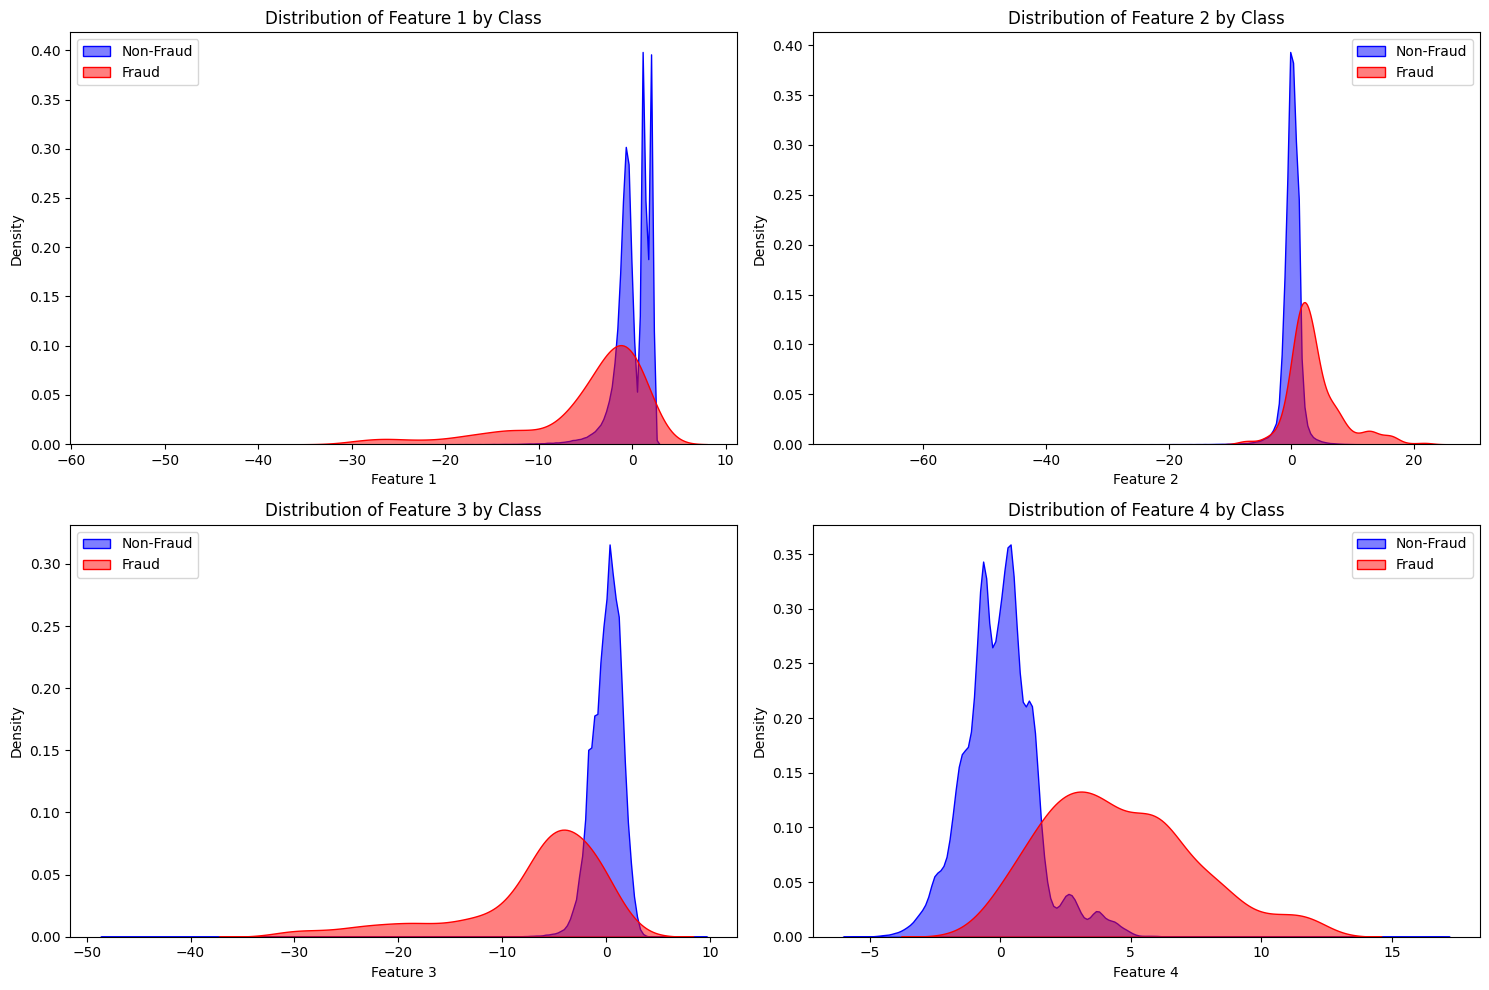

In [2]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 2: Load the dataset (adjust file path as per your system)
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')

# Step 3: Distribution plots for selected features
plt.figure(figsize=(15, 10))
for i in range(1, 5):  # Adjust the range to visualize more features
    plt.subplot(2, 2, i)
    sns.kdeplot(data[data['Class'] == 0][data.columns[i]], label='Non-Fraud', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(data[data['Class'] == 1][data.columns[i]], label='Fraud', fill=True, color='red', alpha=0.5)
    plt.title(f'Distribution of Feature {i} by Class')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


**Violin Plots for Feature Distributions**

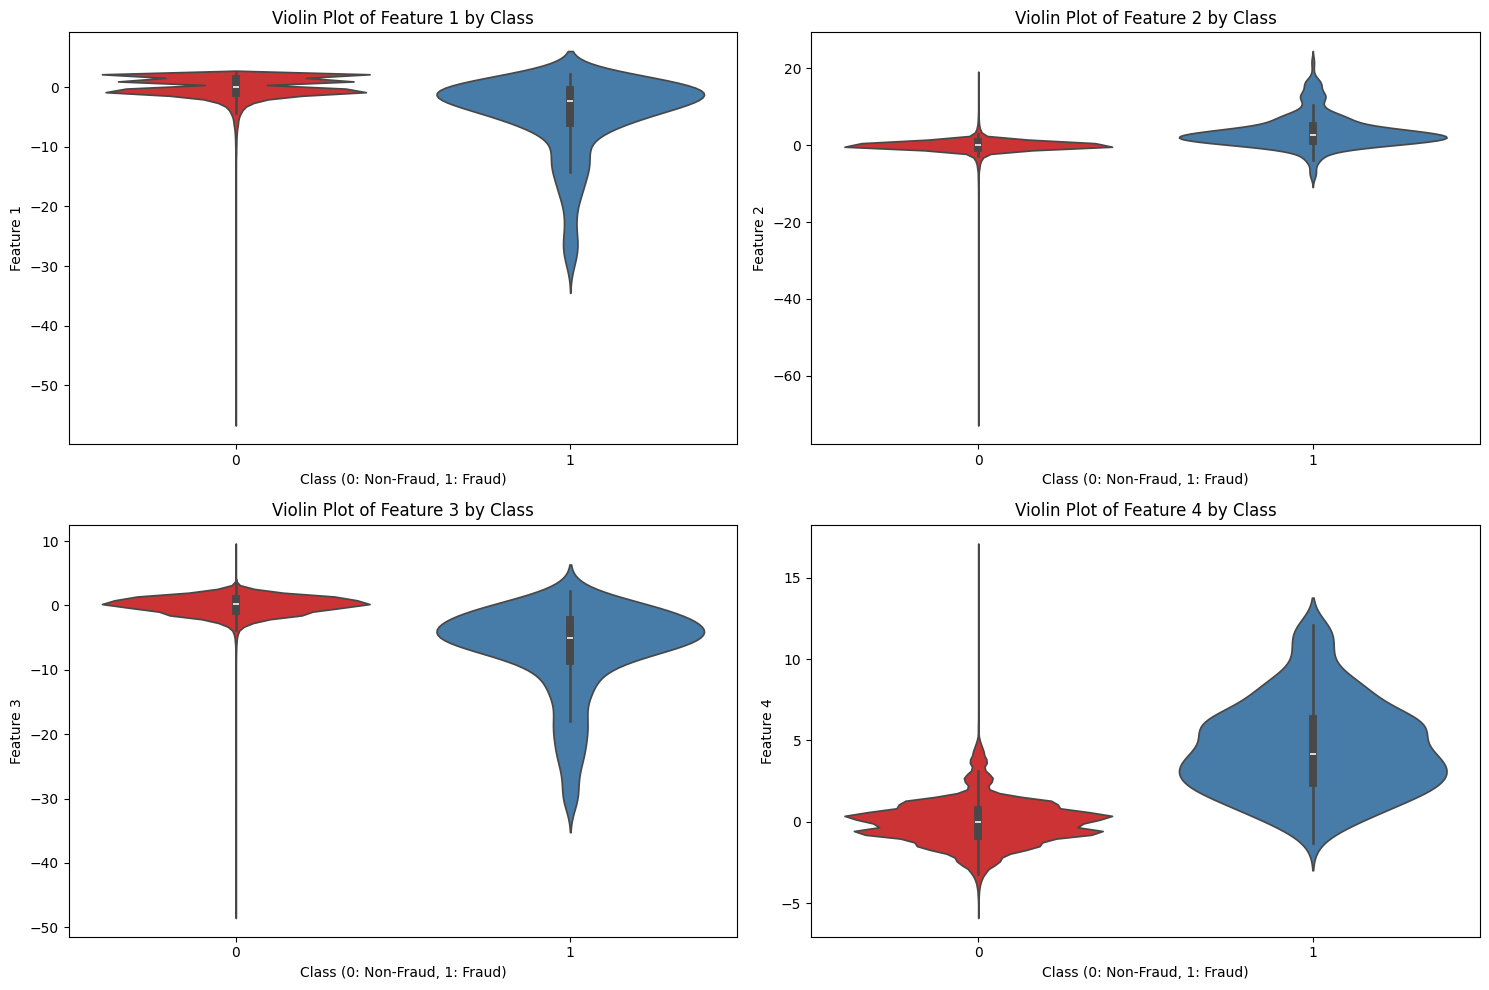

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 2: Load the dataset (adjust file path as per your system)
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\CREDIT CARD FRAUD DETECTION\creditcard.csv')

# Create violin plots for the first few features
plt.figure(figsize=(15, 10))
for i in range(1, 5):  # Adjust the range to visualize more features
    plt.subplot(2, 2, i)
    sns.violinplot(x='Class', y=data.columns[i], data=data, hue='Class', palette='Set1', legend=False)
    plt.title(f'Violin Plot of Feature {i} by Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(f'Feature {i}')

plt.tight_layout()
plt.show()


**Cumulative Gains and Lift Charts**

In [8]:
print(data.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
# Assuming data is your DataFrame and 'Class' is your target variable column
X = data.drop(columns=['Class'])  # Replace 'target' with 'Class'
y = data['Class']  # Use the correct target variable name

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Load your data
# data = pd.read_csv('your_data.csv')  # Load your DataFrame

# Check the columns of the DataFrame
print(data.columns)  # Inspect the columns

# Assume the target variable is identified correctly as 'Class'
X = data.drop(columns=['Class'])  # Replace 'Class' with your actual target variable name
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models with adjusted parameters
log_model = LogisticRegression(max_iter=1000)  # Increased max_iter
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
nn_model = MLPClassifier(max_iter=500)

log_model.fit(X_train_scaled, y_train)  # Fit on scaled data
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

# Now, you can plot cumulative gains
plot_cumulative_gain(y_test, log_model.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")
plot_cumulative_gain(y_test, dt_model.predict_proba(X_test)[:, 1], "Decision Tree")
plot_cumulative_gain(y_test, rf_model.predict_proba(X_test)[:, 1], "Random Forest")
plot_cumulative_gain(y_test, nn_model.predict_proba(X_test)[:, 1], "Neural Network")


**Lift Charts**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [4]:
# Load your data
data = pd.read_csv('creditcard.csv')  # Make sure to replace this with your actual data

# Inspect the columns of the DataFrame
print(data.columns)  # Check column names to identify the target column

# Define features and target variable
X = data.drop(columns=['V2'])  # Replace 'target' with your actual target variable name
y = data['V2']


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('creditcard.csv')  # Adjust with your actual file path

# Assuming the target variable is named 'target'
X = data.drop(columns=['V2'])
y = data['V2']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the target variable
print(y_train.unique())  # Display unique values
print(y_train.dtype)  # Display the data type

# Convert to binary if necessary (for binary classification)
if y_train.dtype in [np.float64, np.float32]:  # Continuous
    y_train = (y_train > 0.5).astype(int)  # Convert to binary


[-0.38078271 -0.62694277  0.82056565 ...  0.14402297  0.99294612
 -0.7848505 ]
float64


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the model with increased max_iter
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)


NameError: name 'X_train' is not defined

**Piano Graph**

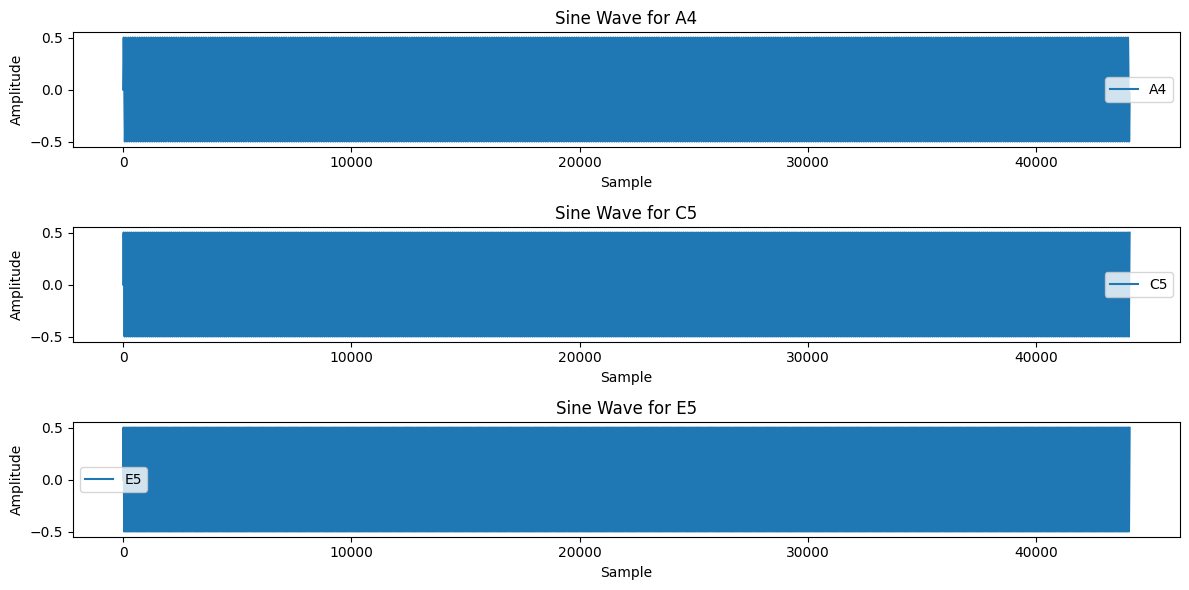

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a sine wave for a given frequency
def sine_wave(frequency, duration=1.0, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return 0.5 * np.sin(2 * np.pi * frequency * t)

# Frequencies for some piano notes (A4, C5, E5)
frequencies = [440, 523.25, 659.25]  # A4, C5, E5
note_labels = ['A4', 'C5', 'E5']
waves = [sine_wave(f) for f in frequencies]

# Plot the sine waves
plt.figure(figsize=(12, 6))
for i, wave in enumerate(waves):
    plt.subplot(3, 1, i + 1)
    plt.plot(wave, label=note_labels[i])
    plt.title(f'Sine Wave for {note_labels[i]}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


**Tabla Graph**

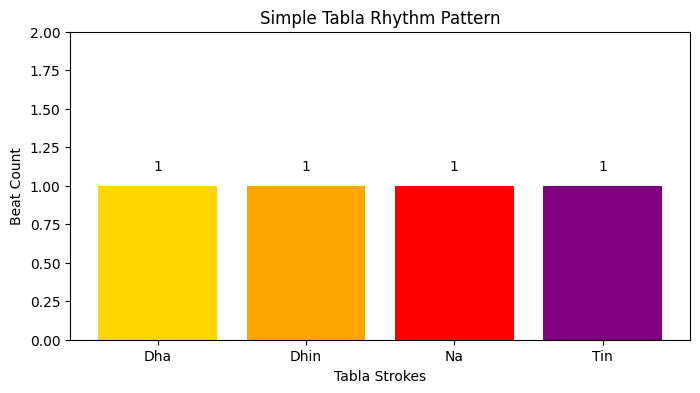

In [5]:
# Sample tabla rhythm pattern (simplified representation)
tabla_strokes = ['Dha', 'Dhin', 'Na', 'Tin']
beat_counts = [1, 1, 1, 1]  # Equal weight for each stroke for this example

# Plot the tabla rhythm
plt.figure(figsize=(8, 4))
plt.bar(tabla_strokes, beat_counts, color=['gold', 'orange', 'red', 'purple'])
plt.title('Simple Tabla Rhythm Pattern')
plt.xlabel('Tabla Strokes')
plt.ylabel('Beat Count')
plt.ylim(0, max(beat_counts) + 1)

# Add annotations
for i, count in enumerate(beat_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()


**Beating Drums Graph**

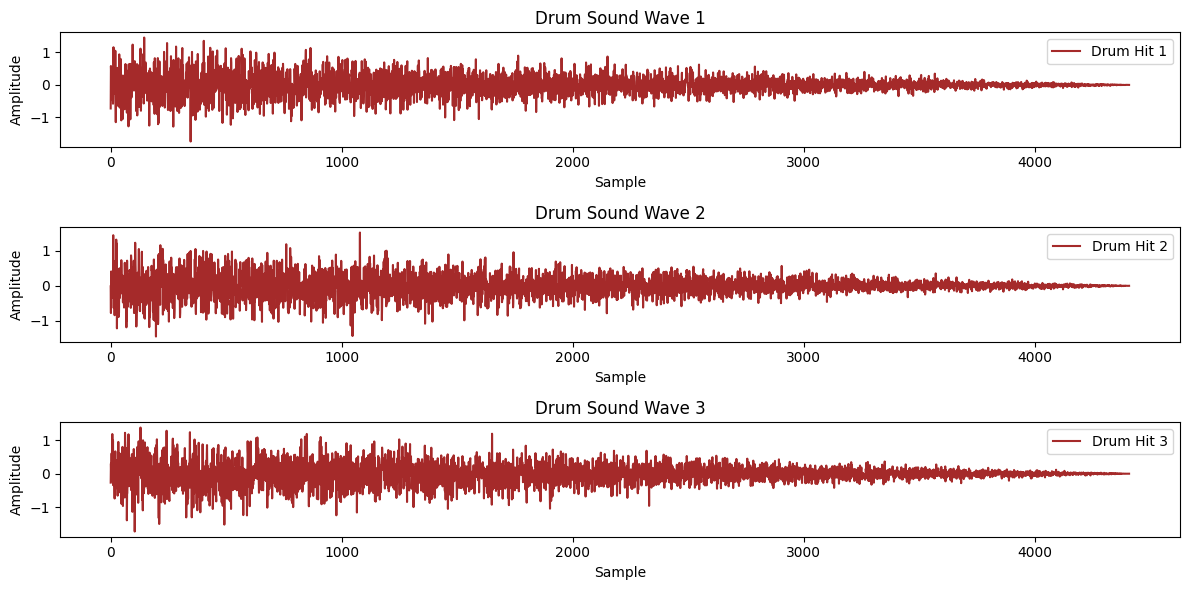

In [6]:
# Function to generate a drum sound (short burst of noise)
def drum_sound(duration=0.1, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    noise = np.random.normal(0, 1, t.shape)
    return 0.5 * noise * (1 - t / duration)  # Decaying amplitude

# Generate multiple drum hits
drum_waves = [drum_sound() for _ in range(3)]  # Three drum hits

# Plot the drum sounds
plt.figure(figsize=(12, 6))
for i, wave in enumerate(drum_waves):
    plt.subplot(3, 1, i + 1)
    plt.plot(wave, label=f'Drum Hit {i + 1}', color='brown')
    plt.title(f'Drum Sound Wave {i + 1}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()


**Flute Graph**

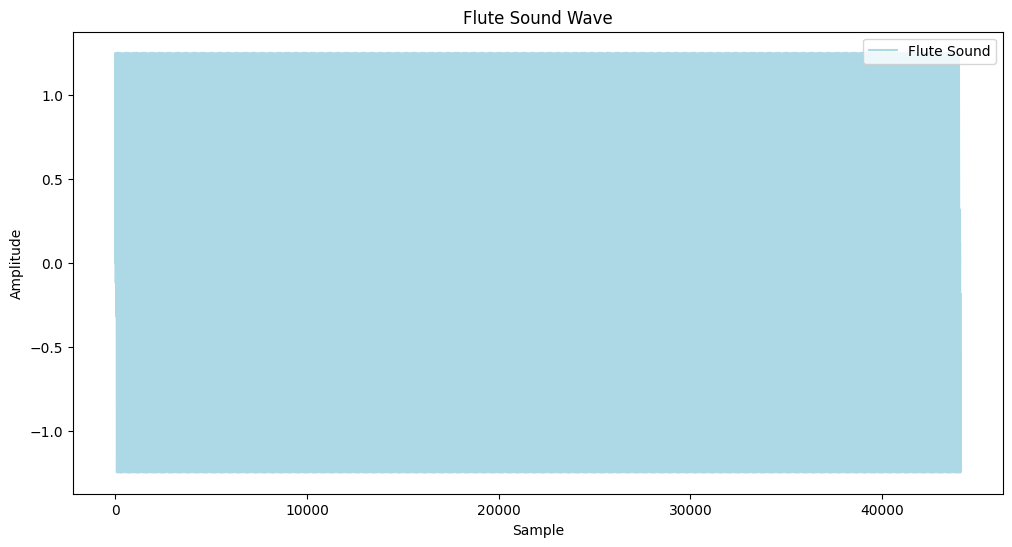

In [7]:
# Function to generate a flute sound by summing sine waves
def flute_sound(duration=1.0, sample_rate=44100):
    frequencies = [440, 880, 1320]  # Fundamental and two harmonics (A4, A5, A6)
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum(0.5 * np.sin(2 * np.pi * f * t) for f in frequencies)
    return wave

# Generate flute sound
flute_wave = flute_sound()

# Plot the flute sound
plt.figure(figsize=(12, 6))
plt.plot(flute_wave, label='Flute Sound', color='lightblue')
plt.title('Flute Sound Wave')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


**Mouth Organ Graph**

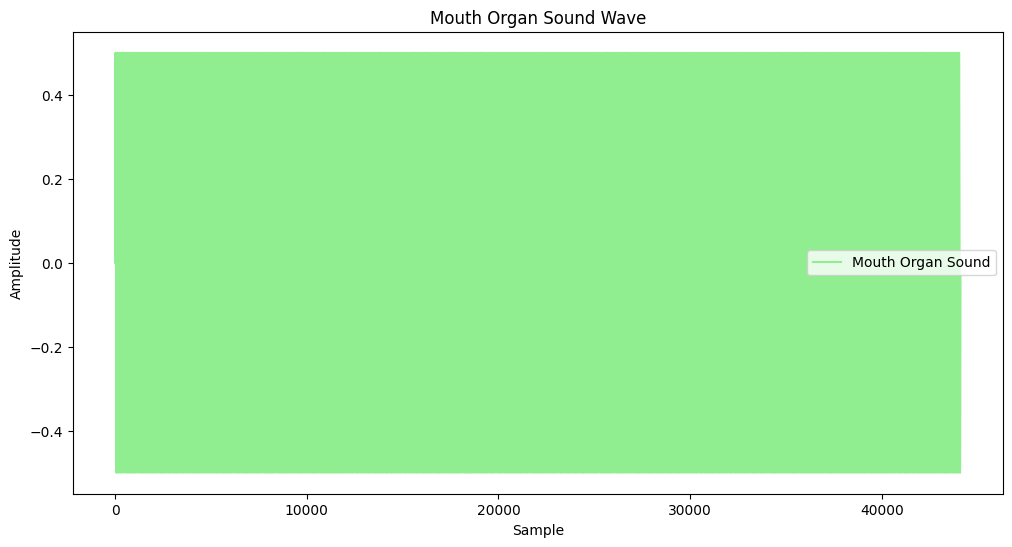

In [8]:
# Function to generate a mouth organ sound with slight modulation
def mouth_organ_sound(duration=1.0, sample_rate=44100):
    fundamental = 440  # A4
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    modulation = 0.1 * np.sin(2 * np.pi * 5 * t)  # Tremolo effect
    wave = 0.5 * np.sin(2 * np.pi * fundamental * t + modulation)  # Add modulation
    return wave

# Generate mouth organ sound
mouth_organ_wave = mouth_organ_sound()

# Plot the mouth organ sound
plt.figure(figsize=(12, 6))
plt.plot(mouth_organ_wave, label='Mouth Organ Sound', color='lightgreen')
plt.title('Mouth Organ Sound Wave')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


**Transaction Amount Distribution**

In [12]:
import pandas as pd

# Load the DataFrame (make sure to replace 'your_file.csv' with the actual filename)
df = pd.read_csv('creditcard.csv')

# Check the first few rows of the DataFrame
print(df.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [13]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


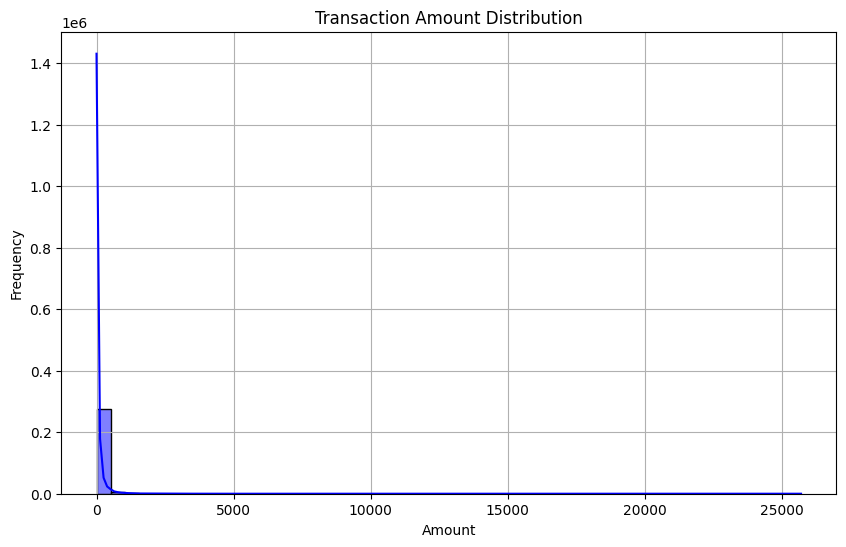

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is defined and contains the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()


**Time Series Analysis of Transactions**

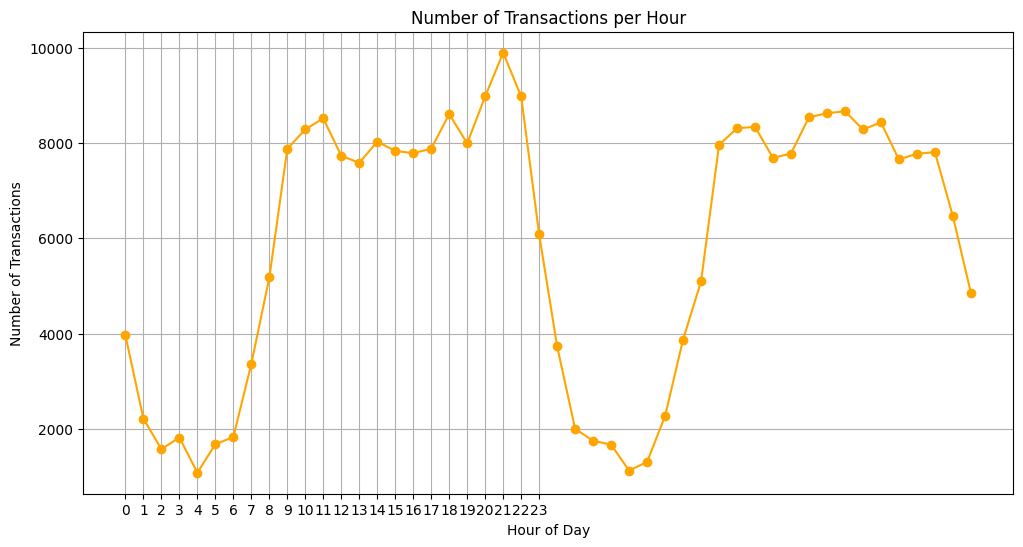

In [15]:
# Convert the 'Time' column to hours and count transactions per hour
df['Hour'] = (df['Time'] / 3600).astype(int)
transactions_per_hour = df['Hour'].value_counts().sort_index()

# Plotting transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_hour.index, transactions_per_hour.values, marker='o', color='orange')
plt.title('Number of Transactions per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


**Feature Correlation Heatmap**

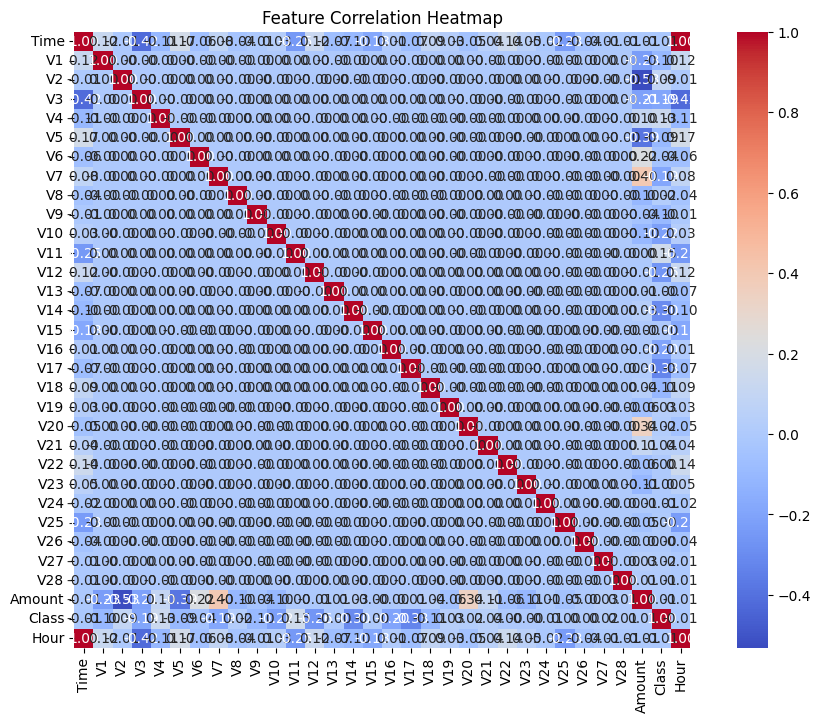

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()


**Anomaly Detection Visualization**

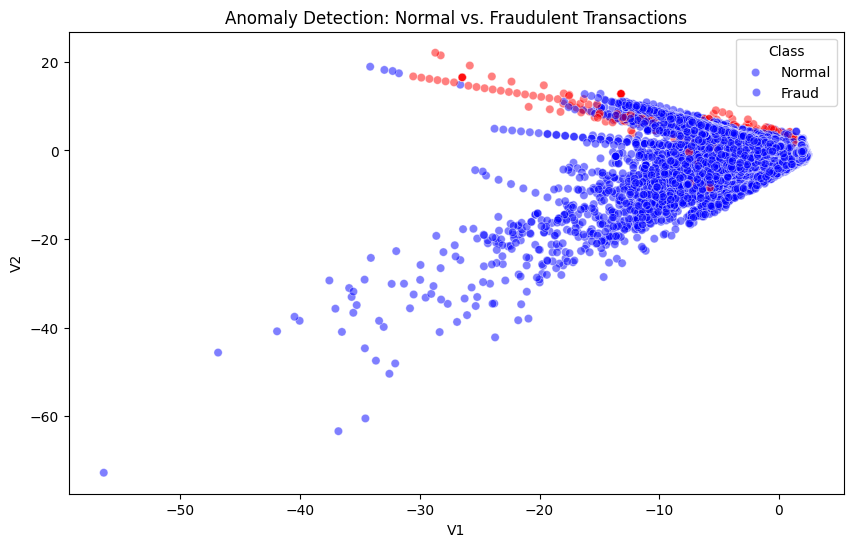

In [20]:
# Scatter plot to visualize normal vs. fraudulent transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='V1', y='V2', hue='Class', palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Anomaly Detection: Normal vs. Fraudulent Transactions')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(title='Class', loc='upper right', labels=['Normal', 'Fraud'])
plt.show()


**Model Performance Metrics**

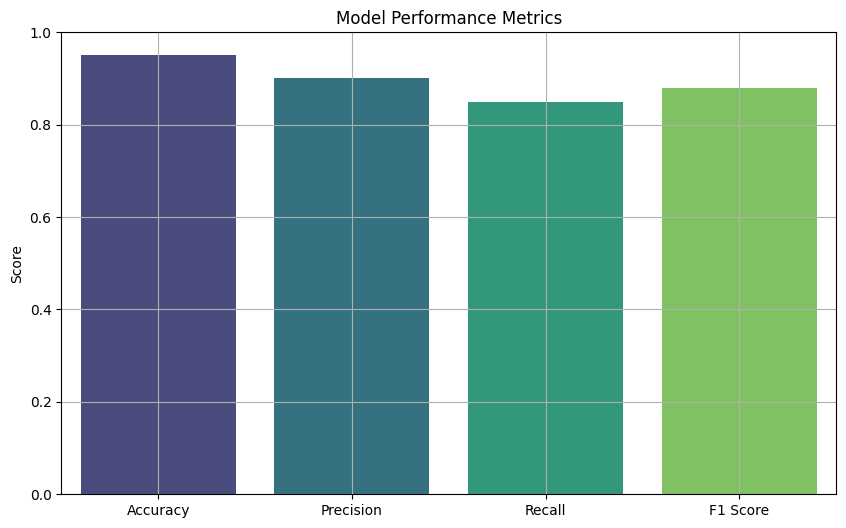

In [22]:
# Assuming these values are obtained from model evaluation
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.95, 0.90, 0.85, 0.88]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, hue=metrics, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid()
plt.show()
